In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#### 1. Reading data from the file

In [3]:
TC_LABELS_FILE = "../data/train-task2-TC-with-spans.labels"

In [4]:
TRAIN_DATA_FOLDER = "../datasets/train-articles/"

In [5]:
column_names = {"document_id": np.int32, 
                "label": np.str, 
                "idx_from": np.int32, 
                "idx_to": np.int32,
                "span":np.str}

In [6]:
df = pd.read_csv(TC_LABELS_FILE, sep="\t", names=column_names.keys())

#### 2. Adding a new feature to the original table

In [7]:
df['span_length'] = df["span"].apply(lambda x : len(str(x).split()))

#### 3. Grouping instances by labels.

In [8]:
df_stat = df.groupby(['label']).span_length.describe().sort_values("count", ascending=False)

Adding a new feature.

In [9]:
df_stat["count_normalized"] = df_stat["count"]/df_stat["count"].sum()

In [10]:
df_stat

,count,mean,std,min,25%,50%,75%,max,count_normalized
label,,,,,,,,,
Loaded_Language,2197.0,3.714611,3.772930,1.0,1.00,3.0,5.00,35.0,0.346694
"Name_Calling,Labeling",1104.0,3.921196,3.306378,1.0,2.00,3.0,5.00,28.0,0.174215
Repetition,617.0,2.696921,3.074382,1.0,1.00,2.0,3.00,29.0,0.097365
Doubt,495.0,17.511111,11.771929,1.0,8.00,15.0,24.00,74.0,0.078113
"Exaggeration,Minimisation",489.0,7.429448,5.579128,1.0,3.00,6.0,10.00,40.0,0.077166
Appeal_to_fear-prejudice,316.0,16.037975,23.017560,1.0,6.00,12.5,21.00,377.0,0.049866
Flag-Waving,249.0,10.056225,9.963484,1.0,2.00,7.0,15.00,51.0,0.039293
Causal_Oversimplification,212.0,19.066038,10.042345,3.0,12.00,18.0,24.00,58.0,0.033454
Appeal_to_Authority,146.0,17.486301,10.827319,2.0,9.00,15.5,23.00,49.0,0.023039


#### 4. Classes sorted by frequences (absolute and relative).

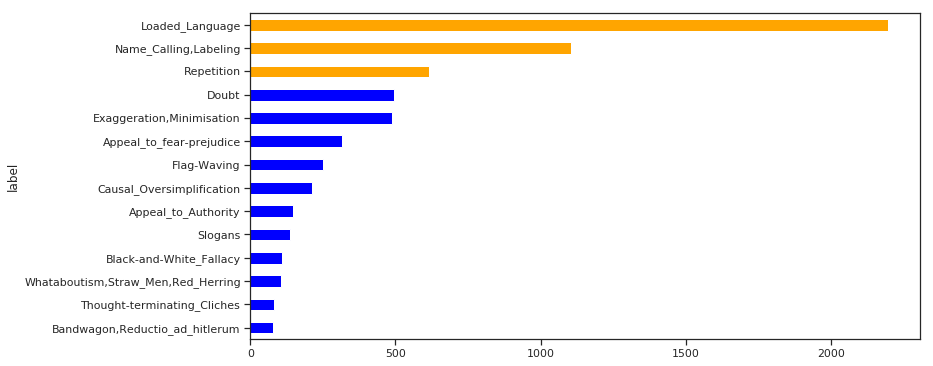

In [11]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange", "orange", "orange"]
df_stat["count"].sort_values().plot.barh(color=color_list)

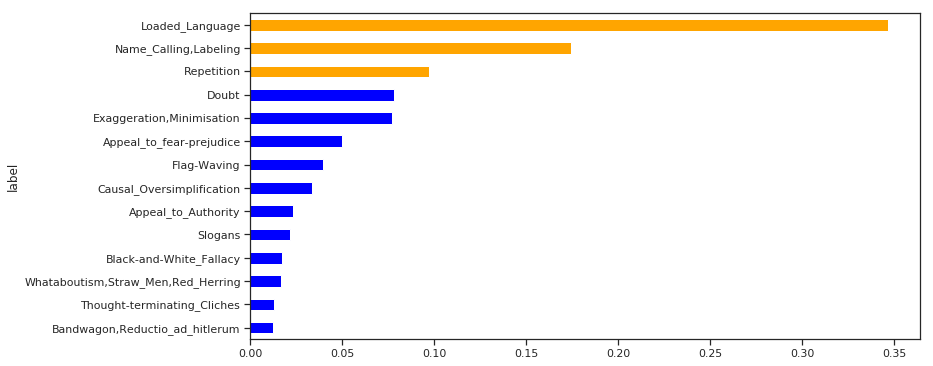

In [12]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange", "orange", "orange"]
df_stat["count_normalized"].sort_values().plot.barh(color=color_list)

#### 5. Classes by the average span length

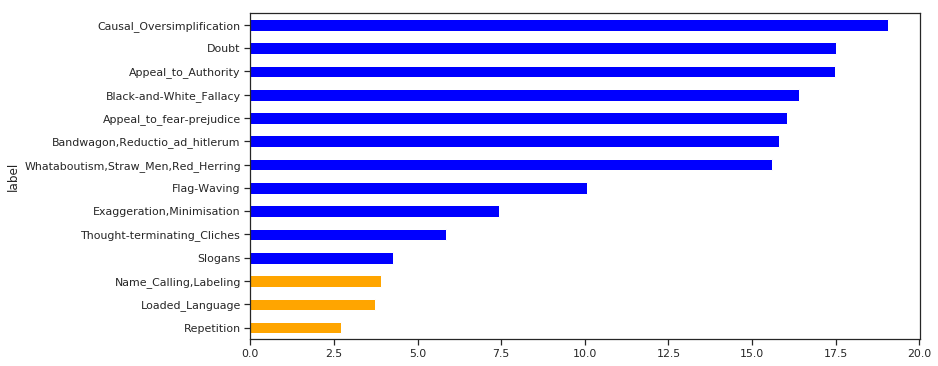

In [14]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["orange", "orange", "orange", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue"]
df.groupby("label").span_length.mean().sort_values().plot.barh(color=color_list)

An interesting observation is that three most popular classes usually have the shortest span length. While those classes represent ~60% of propaganda in the training set their average span length is a bit more than 3 words.

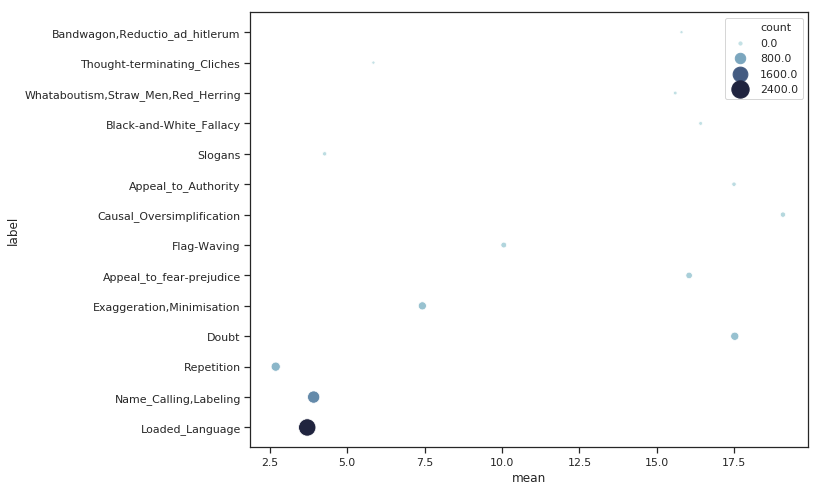

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
df_stat = df_stat.reset_index()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="mean", y="label",
                     hue="count", size="count",
                     palette=cmap, sizes=(10, 300),
                     data=df_stat)

In [19]:
df.groupby("label").get_group('Loaded_Language')["span"].get_values()

array(['the nation that gave the world the Magna Carta is dead".',
       'delighted" with the decision.', 'a striking blow against freedom',
       ..., 'to vilify him', 'sham', 'social justice crybullying'],
      dtype=object)